### IDs:
Insert yours IDs to the cell below

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Imports

In [1]:
import os

In [77]:
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from collections import defaultdict
from scipy.stats import iqr
import scipy.special
import matplotlib.colors as colors
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['axes.grid'] = True

### Question 1 - Defective products

In a manufacturing pipeline products are 3% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

In [3]:
def nbinom_samplesize(n, p, psample):
    """
    Returns the number of Bernoulli trials one needs to perform in order to observe n "successes" with probability at least psample. 
    Each individual trial results in a success with probability p.
    """
    
    # random variable: negative binomial distribution for n successes with each bernoulli trial 
    # having success probability p. Since we shift the distribution by loc=n below, this random 
    # variable represents the sample size (i.e. number of failures k + the requested number of successes n)
    X=stats.nbinom(n=n,p=p,loc=n)  
    
    # Each possible number of failures (0,1,2,...) (and thus each sample size) has the probability attached to it. 
    # The overall probability to observe n successes with any sample size up to n+K (i.e. with k=0, or 1, ..., or K failures) is
    # given by the CDF(K)=P(k=0)+P(k=1)+...+P(k=K). 
    # We need to find where that CDF reaches the requested threshold `psample`. We could do it by generating the
    # CDF values for very long vector of values k=0, 1, 2, ... and then checking at which point those values reach
    # the threshold: np.argmax(X.cdf(np.arange(0,1000)))
    
    # Or, we can just use the provided quantile function for the CDF (also known as percent point function) - this
    # is better as we do not have to deal with long arrays of "possible" values of k to consider (and wondering if our 
    # our array is even long enough). Our variable is already shited by n, so we are getting sample size below:
    
    return int(X.ppf(psample))
    
    

<div class="alert alert-info">
We have decided to use the negative binomial distribution whose probability mass function is defined as:
$$f(k; n, p) \equiv P(X=k) = \binom{k+n-1}{n-1}p^{n}(1-p)^{k}$$

where k is the number of failures, p is the probability of success (receiving a defective product) and n is the rate of failure.
</div>

#### 1.A

How many independent samples should we ask for in order to have a 85% probability of having at least one defective product in the batch sent? You should write a function.

In [4]:
print('Number of samples to ask for to have 85% probability to have at least one defective product in the batch:')
nbinom_samplesize(1, .03, 0.85)

Number of samples to ask for to have 85% probability to have at least one defective product in the batch:


63

#### 1.B
Answer this part again with the following changes: products are 4% defective and we want a 95% probability of at least one defective product in the batch.

In [5]:
print('Number of samples to ask for to have 95% probability to have at least one defective product in the batch, with 4% defective products in production:')
nbinom_samplesize(n=1, p=.04, psample=0.95)

Number of samples to ask for to have 95% probability to have at least one defective product in the batch, with 4% defective products in production:


74

#### 1.C 

Consider the following cases and calculate how many independent samples are required: 

1. Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.
1. Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch.

Explain the difference between the two results. You should use mathematical reasoning based on the properties of distributions you saw in class and visualizations in your answer.

In [6]:
print('Number of samples to ask for to have 90% probability to have at least 5 defective products in the batch, with 10% defective products in production:')
nbinom_samplesize(5, p=0.1, psample=0.9)

Number of samples to ask for to have 90% probability to have at least 5 defective products in the batch, with 10% defective products in production:


78

In [7]:
print('Number of samples to ask for to have 90% probability to have at least 15 defective products in the batch, with 30% defective products in production:')
nbinom_samplesize(15, p=0.3, psample=0.9)

Number of samples to ask for to have 90% probability to have at least 15 defective products in the batch, with 30% defective products in production:


64

In [8]:
X = stats.nbinom(n=5, p=.1, loc=5) # rv represents sample size in the 1st case
Y = stats.nbinom(n=15, p=.3, loc=15) # rv represents sample size in the 2nd case

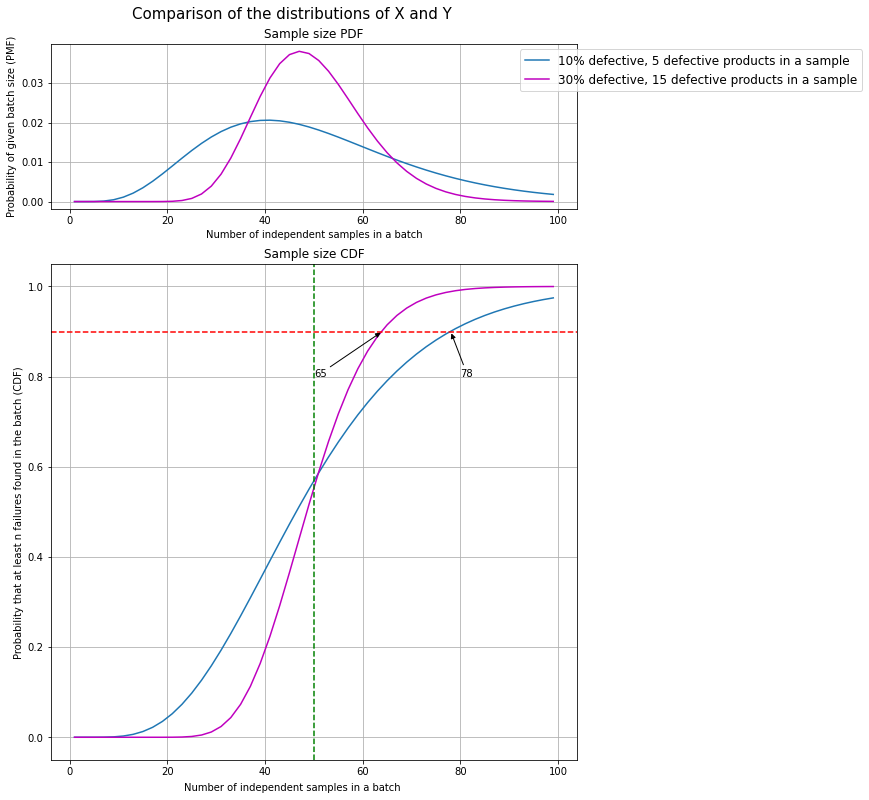

In [9]:
r = range(1, 100, 2)

fig = plt.figure(figsize=(8, 11), layout="constrained", )
spec = fig.add_gridspec(nrows=2, ncols=1, height_ratios=[1, 3])

axt = fig.add_subplot(spec[0, 0])
axt.plot(r, X.pmf(r), '-', label=f"10% defective, 5 defective products in a sample")
axt.plot(r, Y.pmf(r), 'm-', label=f"30% defective, 15 defective products in a sample")
axt.set_xlabel("Number of independent samples in a batch", fontsize=10)
axt.set_ylabel("Probability of given batch size (PMF)", fontsize=10)
axt.title.set_text('Sample size PDF')

axr = fig.add_subplot(spec[1, 0])
axr.plot(r, X.cdf(r), '-')
axr.plot(r, Y.cdf(r), 'm-')
axr.axhline(0.9, c='r', linestyle='--');
axr.axvline(50, c='g', linestyle='--');
axr.annotate('78', xy=(78, 0.9), xytext=(80, 0.8), size=10,
             arrowprops=dict(arrowstyle="-|>", facecolor='black'))

axr.annotate('65', xy=(64, 0.9), xytext=(50, 0.8), size=10,
             arrowprops=dict(arrowstyle="-|>", facecolor='black'))
axr.title.set_text('Sample size CDF')
axr.set_ylabel("Probability that at least n failures found in the batch (CDF)")

fig.supxlabel('Number of independent samples in a batch', fontsize=10)

handles, labels = axt.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.5, .95), prop={'size': 12})
fig.suptitle('Comparison of the distributions of X and Y', size=15);

<div class="alert alert-info">
The distribution functions (top panel) show that we have higher probabilities for smaller batches to contain only 5 defective samples (blue curve) than 15 defective samples (purple curve), even though the probability of failure is lower in the first place. But the probabilities of pretty large smaple sizes in the former case are also greater. This is because at lower failure rate we expect longer "wait times" for every next failed sample to arrive, so large batches are also relatively likely. In contrast to that, at high failure rate the "wait time" for next failed sample becomes shorter, so as it seems most of the time we expect to get all the requested 15 failures at smaller batch sizes, and it is quite unlikely that we will need a very large batch size.

More formally,  for negative binomial distribution  the expectation of the number of failures before $n$ successes are observed is $\mu=n(1-p)/p$. Hence, for the batch size the expectation becomes $\mu_B=\mu+n=n/p$. For 10% failure probability and the requirement to observe 5 defective samples in a batch, the expected batch size becomes $\mu_{B1}=\dfrac{5}{0.1}=50$. For 30% failure probability with the requirement of 15 defective samples in a batch, the expected batch size is exactly the same, $\mu_{B2}=ֿ\dfrac{15}{0.3}=50$ !! 

But the 2nd distribution is much narrower (in accordance with what we tried to argue above): the variance of negative binomial is $\sigma^2=n(1-p)/p^2$, hence in the former case we have $\sigma_{B1}^2=5\cdot ֿ\dfrac{0.9}{0.1}^2 = 450$, while in the latter case the variance becomes $\sigma_{B2}^2=15\cdot \dfrac{0.7}{0.3}^2 = 116.67$. Thus the distributions are located at exactly the same mean sample size, but the 2nd one is much narrower (it typically takes a larger batch to accumulate 15 defective samples than just 5 in the "best" case, but because of the higher probability of failure it rarely takes as long to get 15 as it might to get 5 in the "worst" case).

This intrerplay is even better reflected in the CDF (lower panel) that shows the cumulative probability that the requested number of defective items, $n$,  is observed in a batch of any size *up to* $N$ (or equivalently that the batch of size $N$ will contain *at least* $n$ defective samples). The CDF starts raising faster for (5 defective samples, 10% failure probability) case (due to longer left tail in the PDF), but then it slows down (long right tail in the PDF!) and crosses over with the CDF for the other case (just about where the mean expected batch size is located in both cases). The latter CDF is more steep in accordance with the corresponding PDF being narrower (smaller variance). As we are looking for pretty high probability of the batch to contain the requested number of defective items (90% quantile), we are in the region wehere the CDF of the (15 defective samples, 30% failure probability) already far overtook the other CDF and the batch size that guarantees such probability is achieved earlier.
</div>

### Question 2 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 

Here are some findings of the survey:
* The population of SH and RG is 16,000 and 22,000 respectively. <br>
* The mean rent in SH and RG is 6300RCU and 4200RCU respectively.
* The median rent is 4600RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

In [11]:
rng = np.random.default_rng(123)

In [286]:
class town:
    def __init__(self, pop, mean, median, iqr, var=None, rng=None):
        """Setup the population and the known distribution parameters that we want to keep fixed. We can also pass preset rng."""
        self.pop = pop
        self.mean = mean
        self.median = median
        self.iqr = iqr
        self.var = var # None is allowed, in which case it will not be used
        if rng is None: self.rng = np.random.default_rng()
        else: self.rng = rng
            
    def get_rent_stats(self):
        return np.mean(self.rent), np.median(self.rent), stats.iqr(self.rent), np.var(self.rent)
    
    def get_phi_stats(self):
        return np.mean(self.phi), np.median(self.phi), stats.iqr(self.phi), np.var(self.phi)
    
    @staticmethod
    def draw_hist(sh, rg, scenario):
        fig = plt.figure(figsize=(12, 6), layout="constrained", )
        plt.hist(sh.rent, bins=100, color = "orange", label = "Random Grove", alpha = 0.5)
        plt.hist(rg.rent, bins=100, color = 'magenta', label = "Stochastic Heights", alpha = 0.5)
        plt.title(f"Plot of Stochastic Heights and Random Grove Rent Scenario {scenario}")
        plt.xlabel("Rent (RCU)")
        plt.ylabel("Number of contracts")
        plt.legend()
        plt.show()
        sh_mean, sh_median, sh_iqr, sh_var = sh.get_rent_stats()
        rg_mean, rg_median, rg_iqr, rg_var = rg.get_rent_stats()
        print(f"For SH, the mean is {sh_mean}, the median is {sh_median}, the IQR is {sh_iqr}, and the var is {sh_var}")
        print(f"For RG, the mean is {rg_mean}, the median is {rg_median}, the IQR is {rg_iqr}, and the var is {rg_var}")

    @staticmethod
    def heatmap(rent, phi, n_bins, title, **kwargs):
        plt.grid(False)
        plt.hist2d(rent, phi, bins=n_bins, **kwargs)
        plt.title(title, fontsize=14)
        plt.xlabel('Rent', fontsize=18)
        plt.ylabel('Phi', fontsize=18)
        cbar = plt.colorbar()
        cbar.set_label('Contracts')
        plt.show()
    
    def phi_extension(self, name, alpha):
        dist_stats, dist_median, dist_iqr, dist_var = self.get_rent_stats()
        phi_mean, phi_median, phi_iqr, phi_var = self.get_phi_stats()
        cov = np.cov(self.rent, self.phi)[0, 1]
        expected_cov = alpha * math.sqrt(np.var(self.rent)) * math.sqrt(np.var(self.phi))
        print(f"For {name} the covariance is {cov:.3f}, the expected covariance is {expected_cov:.3f}, and the covariance/expected covariance is {cov/expected_cov*100.0:.3f}%")
        
        
    def scenario(self): 
        """Will generate distribution for all 3 scenarios"""
        # we will start with simple, unimodal normal that has the right median and IQR.
        # For the normal, mean and median are the same. and the IQR is symmetric. let us find out 
        # the required variance:
        w = self.iqr/2 # deviation from the median or mean that should give us 25% or 75% quantile (symmetric)
        q75 = stats.norm.ppf(0.75) # the 75% quantile of the standard normal distribution (0.67).
        # we should observe the q75 at price median+w in our initial distribution, and that should define the variance:
        s = w/q75
        self.rent = self.rng.normal(loc=self.median, scale=s, size=self.pop)
        
        # we got a distribution with correct median anb IQR
        # let us now adjust the mean. We are going to be moving some values.
        # For as long as we keep the moved value on the same side of the median, the latter should not change
        
        md = np.median(self.rent)
        m = np.mean(self.rent)
        
        diff = self.mean - m # by how much we should shift the mean
        N = 0
        NMAX=200
        while abs(diff) > 1e-2 and N < NMAX:
            # how many points we want to move - anywhere between 5 and 15%, randomly selected:
            n_move = int(rng.uniform(0.2,0.4)*self.pop)
            to_move_idx = rng.choice(self.pop, n_move, replace=False) # indexes of the values we want to change
        
            vals = self.rent[to_move_idx] # current values of the rents we want to modify
            new_vals = vals + self.pop*diff/n_move # attempt moving each rent equally to enforce the desired mean
        
            # don't move to far to the left if we need a small mean... (or we could get negatives eventually!)
            too_small = (new_vals < 0.1*self.mean) 
            if len(too_small) > 0: 
                to_move_idx = to_move_idx[ (~ too_small) ]
                vals = vals[ ( ~ too_small ) ]
                new_vals = new_vals[ (~ too_small) ]
                n_move = len(to_move_idx)
        
            # but we want to keep the median intact. Let's see how many points cross the median when we move them:
            cross = (new_vals < md) & (vals > md ) | (new_vals > md ) & (vals < md ) 
            # but we also want to preserve the IQR.
            q = np.quantile(self.rent, [0.25, 0.75]) # 25% and 75% quantiles of the current distribution
            break_iqr = ((new_vals - q[0])*(vals - q[0]) < 0 ) | ((new_vals - q[1])*(vals - q[1]) < 0 )

            # let's move only the rents that do not cross the median and do not bnreak IQR
            to_move_idx = to_move_idx[ (~ cross) & (~ break_iqr)] 
            n_move = len(to_move_idx)
            if n_move == 0: continue

            new_vals = new_vals[(~ cross) & (~ break_iqr)]        
            self.rent[to_move_idx] = new_vals
        
            # update the difference between what we have and what we want (we refused some updates,
            # so now we are not getting quite the mean we wanted!)
            diff = self.mean - np.mean(self.rent) 
            N = N+1
        
        print("Mean adjusted in ", N, " iterations.", sep="")
        
    def make_PHI(town, median, mean, a):
        '''
        This function will take the Town object and attach to it array of simulated PHI values.
        The simulation is similar for what we used earlier to simulate rent values themselves.
        We sstart from setting phi = rent - this ensures correlation of exactly 1.
        Then we shift the whole array of phi by constant value to ensure the median has the requested value.
        The correlation still remains 1 of course
        Then we add constant shifts to individual PHI values to achieve the desired mean. We make sure that
        only those elements of the array are used that do not cross the median when the shift is added, so the median
        remains intact as we adjust the mean.
        After those adjustments, the correlation between PHI and rent is hopefully still high enough, 
        so we need to further degrade it (while preserving mean and median) to reach the desired value. 
        This is achieved by gradually adding normal noise with mean 0 to the values of PHI that are sufficiently 
        far from the median.
        '''

        town.phi = town.rent # start with 100% correlation
        #town.phi = np.mean(town.phi)+(town.phi - np.mean(town.phi))*2
        town.phi = town.phi+median - np.median(town.phi)  # move to have the required median, correlation is still 1
        #print("cor=",np.corrcoef(phi,rent)[0,1])
        diff = mean - np.mean(town.phi)

        NMAX=200
        N=0
        while abs(diff) > 1e-2 and N < NMAX:
            # how many points we want to move - anywhere between 5 and 15%, randomly selected:
            n_move = int(rng.uniform(0.9, 0.99)*town.pop)
            to_move_idx = rng.choice(town.pop, n_move, replace=False) # indexes of the values we want to change

            vals = town.phi[to_move_idx] # current values of the rents we want to modify
            new_vals = vals + town.pop*diff/n_move # attempt moving each rent equally to enforce the desired mean

            # don't move to far to the left if we need a small mean... (or we could get negatives eventually!)
            too_small = (new_vals < 0.1*mean) 
            if len(too_small) > 0: 
                to_move_idx = to_move_idx[ (~ too_small) ]
                vals = vals[ ( ~ too_small ) ]
                new_vals = new_vals[ (~ too_small) ]
                n_move = len(to_move_idx)

            # but we want to keep the median intact. Let's see how many points cross the median when we move them:
            cross = (new_vals < median) & (vals > median ) | (new_vals > median ) & (vals < median ) 

            # let's move only the rents that do not cross the median and do not bnreak IQR
            to_move_idx = to_move_idx[ (~ cross) ] 
            n_move = len(to_move_idx)
            if n_move == 0: continue

            new_vals = new_vals[(~ cross)]        
            town.phi[to_move_idx] = new_vals

            # update the difference between what we have and what we want (we refused some updates,
            # so now we are not getting quite the mean we wanted!)
            diff = mean - np.mean(town.phi) 
            N = N+1

        print("Mean adjusted in ", N, " iterations.", sep="")
        cor = np.corrcoef(town.phi,town.rent)[0,1]
        if cor < a:
            raise RuntimeError(f"Correlation too low ({cor}), can't achieve the requirements")

        # we achieved desired mean and median, and correlation is still greater than we want it to be
        # let's shake the values until we decrese the correlation to the desired value:
        print(f"mean={np.mean(town.phi)}")
        print(f"median={np.median(town.phi)}")    
        print(f"starting correlation={cor}")
        N = 0
        while abs(a-cor) > 0.001 and N < 600:
            to_shake = np.arange(town.pop, dtype=int)
            # let's shake only values away from median, hoefully this will help to keep the median intact...
            to_shake = to_shake[ np.abs(town.phi - np.median(town.phi)) > 150 ]
            # add weak normal noise to all values. This is not going to affect the mean (on average) 
            # as the mean of what we add is 0:
            town.phi[to_shake] = town.phi[to_shake]+rng.normal(loc=0, scale = 30, size = len(to_shake))
            cor = np.corrcoef(town.phi,town.rent)[0,1]
            N += 1
        print(f"Correlation adjusted in {N} iterations.")
        print(f"correlation={cor}")
        print(f"mean={np.mean(town.phi)}")
        print(f"median={np.median(town.phi)}")
        
    def print_stats(self, title, scenario):
        print(f"Statistics for {title} scenario {scenario}")
        print("Mean =  ", np.mean(self.rent))
        print("SD =    ", np.std(self.rent))        
        print("Median =",np.median(self.rent))
        print("IQR =   ",stats.iqr(self.rent))


#### 2.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

In [287]:
SH1=town(pop=16000, mean=6300, median=4600, iqr=500, rng=rng)
SH2=town(pop=16000, mean=6300, median=4600, iqr=500, rng=rng)
RG1=town(pop=22000, mean=4200, median=4600, iqr=800, rng=rng)
RG2=town(pop=22000, mean=4200, median=4600, iqr=800, rng=rng)
SH1.scenario()
SH2.scenario()
RG1.scenario()
RG2.scenario()

Mean adjusted in 16 iterations.
Mean adjusted in 16 iterations.
Mean adjusted in 10 iterations.
Mean adjusted in 10 iterations.


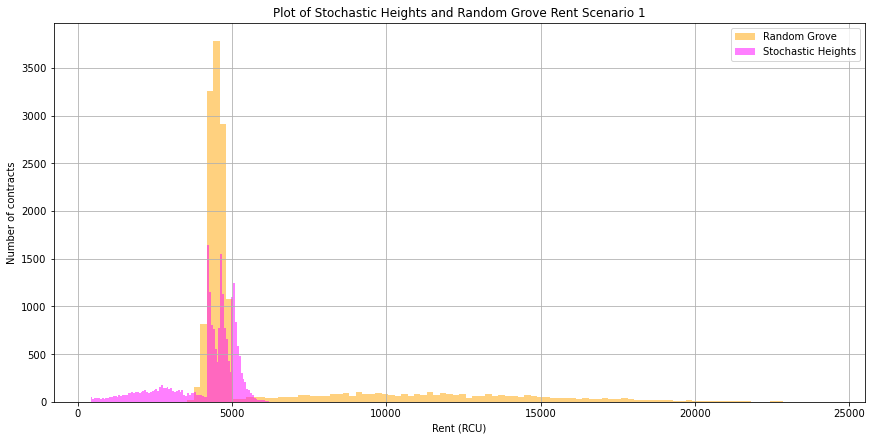

For SH, the mean is 6299.999992301147, the median is 4600.292982190329, the IQR is 494.25414061740776, and the var is 13408904.286685852
For RG, the mean is 4200.000031733586, the median is 4607.550678828467, the IQR is 802.7078008085382, and the var is 1265174.1742875369


In [288]:
town.draw_hist(SH1, RG1, 1)

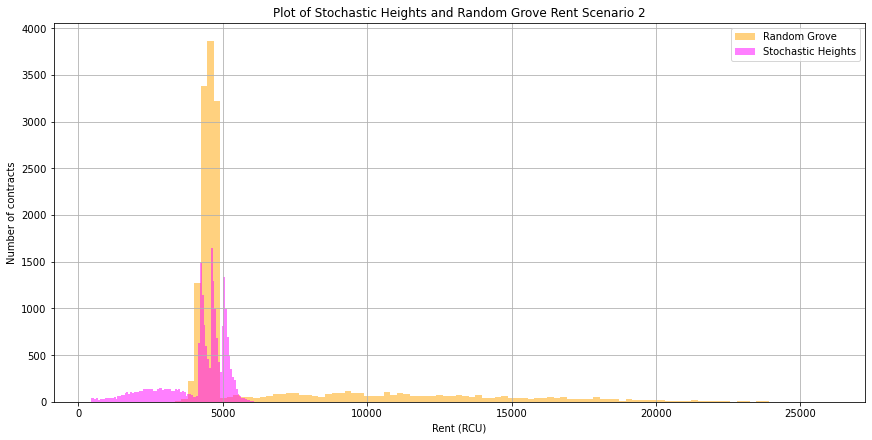

For SH, the mean is 6299.99868198321, the median is 4598.55633611403, the IQR is 498.65632360358995, and the var is 14250012.413244212
For RG, the mean is 4200.000005360721, the median is 4588.995409782572, the IQR is 806.1247082718701, and the var is 1191147.0667116733


In [289]:
town.draw_hist(SH2, RG2, 2)

<div class="alert alert-info">
While the values for mean and median may be similar between runs the var is different.
</div>

#### 2.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG.

<div class="alert alert-info">
The class I wrote previously meets this requirement so I am calling scenario again.
</div>

In [290]:
SH3=town(pop=16000, mean=6300, median=4600, iqr=500, rng=rng)
RG3=town(pop=22000, mean=4200, median=4600, iqr=800, rng=rng)
SH3.scenario()
RG3.scenario()

Mean adjusted in 16 iterations.
Mean adjusted in 9 iterations.


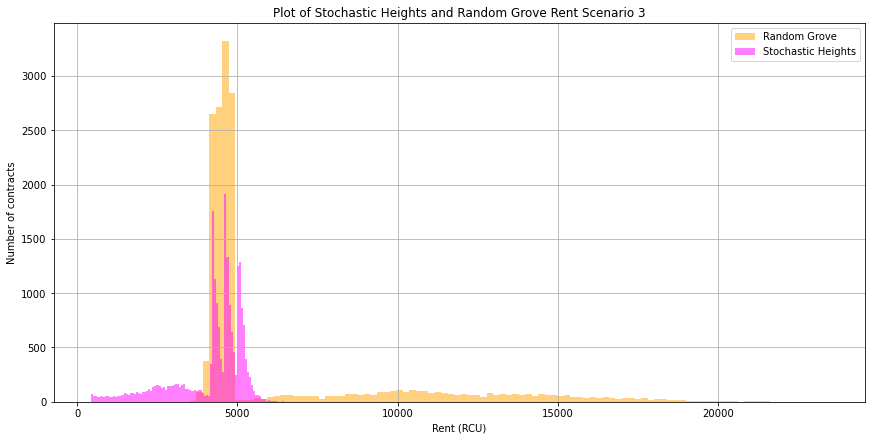

For SH, the mean is 6299.999516643449, the median is 4601.039928801681, the IQR is 507.9264017807445, and the var is 12819204.045115875
For RG, the mean is 4200.009767179227, the median is 4600.813914034695, the IQR is 802.7511576078778, and the var is 1226881.3715958144


In [291]:
town.draw_hist(SH3, RG3, 3)

The survey also examined the per household income (PHI) in these two places.<br>

It found that:<br>
* The mean of PHI in SH is 12500 and in RG is 8500.
* The median is 12000 in SH and 8000 in RG.
* The covariance of the rent and the PHI was observed to be as in the formula below with $\alpha=97\%$ and $\alpha=89\%$ in SH and in RG respectively.<br><br>
$$Cov(rent, PHI) = \alpha * \sqrt{Var(rent)} * \sqrt{Var(PHI)}$$

#### 2.C
Produce rent and PHI data for the two cities, that is consistent with these findings. The covariances in your data can deviate by up to 1% from the numbers given $\alpha$.

In [292]:
town.make_PHI(SH3, median=12000, mean=12500, a=0.97)

Mean adjusted in 5 iterations.
mean=12500.000000846547
median=11947.094678685851
starting correlation=0.9808299541194833
Correlation adjusted in 367 iterations.
correlation=0.970991410453428
mean=12499.824444157795
median=11945.030213824746


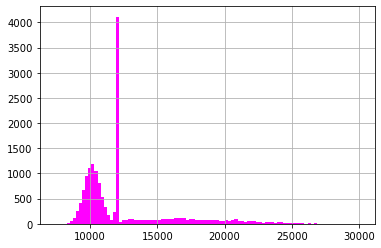

In [293]:
plt.hist(SH3.phi, color = "magenta", bins = 100);

<div class="alert alert-info">
The values of the mean, median, and correlation reported above are sufficiently close to the requested ones.  
    
Now let's generate PHI for RG:
</div>

In [294]:
town.make_PHI(RG3,median=8000, mean=8500, a=0.89)

Mean adjusted in 4 iterations.
mean=8499.995895420636
median=8020.482439845646
starting correlation=0.906016089662054
Correlation adjusted in 72 iterations.
correlation=0.8909038830620478
mean=8499.548157526804
median=8020.482439845646


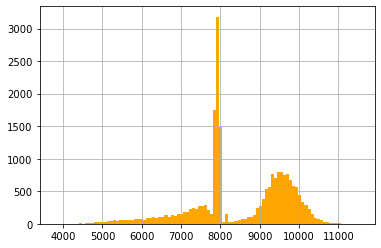

In [295]:
plt.hist(RG3.phi, color = "orange", bins = 100);

<div class="alert alert-info">
Again, the simulated values are close enough to what's been requested.
We will print the statistics for the rent of each district, the PHI of each district, and the covariance.
</div>

In [296]:
SH3.phi_extension("Stochastic Heights", .97)

For Stochastic Heights the covariance is 12215806.355, the expected covariance is 12202570.954, and the covariance/expected covariance is 100.108%


In [297]:
RG3.phi_extension("Random Grove", .89)

For Random Grove the covariance is 1206531.269, the expected covariance is 1205252.373, and the covariance/expected covariance is 100.106%


#### 2.D
Produce two heatmaps that describe these two bivariate joint distributions. Make sure you carefully consider the selected binning resolution.

<div class="alert alert-info">
For the town objects we simulated:
</div>

<Figure size 864x1152 with 0 Axes>

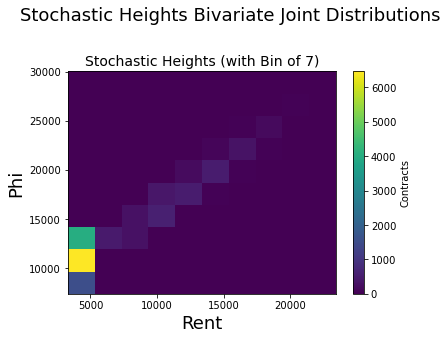

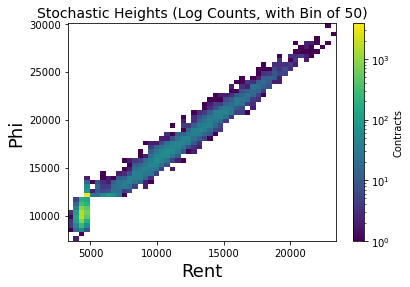

In [298]:
fig = plt.figure(figsize=(12, 16), layout="constrained", )
fig = plt.figure(figsize=(6, 9))
fig.suptitle('Stochastic Heights Bivariate Joint Distributions', size=18);
spec = fig.add_gridspec(nrows=2, ncols=1)

axt = fig.add_subplot(spec[0, 0])
axt= town.heatmap(SH3.rent, SH3.phi, n_bins=10,title="Stochastic Heights (with Bin of 7)", cmap='viridis')

axr = fig.add_subplot(spec[1, 0])
axr = town.heatmap(SH3.rent, SH3.phi, n_bins=50,title="Stochastic Heights (Log Counts, with Bin of 50)", norm=colors.LogNorm());

<Figure size 864x1152 with 0 Axes>

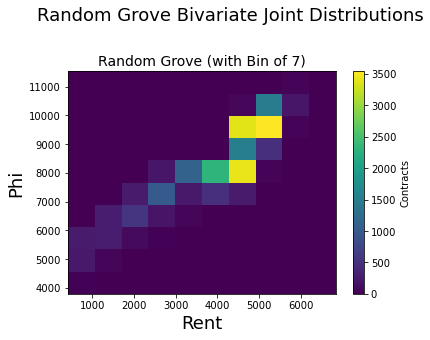

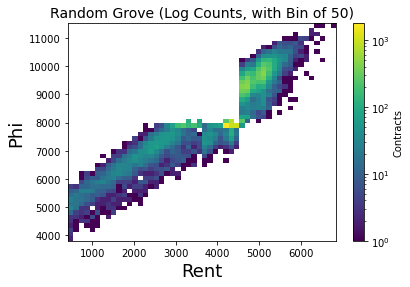

In [299]:
fig = plt.figure(figsize=(12, 16), layout="constrained", )
fig = plt.figure(figsize=(6, 9))
fig.suptitle('Random Grove Bivariate Joint Distributions', size=18);
spec = fig.add_gridspec(nrows=2, ncols=1)

axt = fig.add_subplot(spec[0, 0])
axt= town.heatmap(RG3.rent, RG3.phi, n_bins=10,title="Random Grove (with Bin of 7)", cmap='viridis');

axr = fig.add_subplot(spec[1, 0])
axr = town.heatmap(RG3.rent, RG3.phi, n_bins=50,title="Random Grove (Log Counts, with Bin of 50)", norm=colors.LogNorm());

### Question 3 - Multinomial Distributions

1. Let $X \sim Multinomial(n,\vec{p})$ be a multinomial random variable where $n=20$ and $\vec{p} = (0.2,  0.1,  0.1,  0.1,  0.2,  0.3)$. Note that X is a vector of counts.


2. Let $Y = X_2 + X_3 + X_4$ be a random variable.


3. Create $k=100$ experiments where $X$ is sampled using Python. Calculate the empirical centralized third moment of $Y$ based on your $k$ experiments.


4. Compare your result to the calculation in class for the centralized third moment of the **binomial** distribution and explain your observation.

In [263]:
np.random.seed(900)

X = np.random.multinomial(size = 100, n = 20, pvals=[0.2,  0.1,  0.1,  0.1,  0.2,  0.3])
Y = X[:,[1,2,3]].sum(axis=1)

<div class="alert alert-info">
$$ Y = X_{2} + X_{3} + X_{4} \sim B(20, p_{2} + p_{3} + p_{4})=B(20, 0.3)$$
</div>

In [264]:
empirical_third_moment = (np.power((Y - Y.mean()), 3)).sum() / Y.shape[0]

<div class="alert alert-info">
The formula from class states that the centralized third moment of the binomial distribution can be represented as:
$$np(1-p)(1-2)p$$
</div>

In [265]:
n = 20 
p = 0.3 
binomial_third_moment = n * p * (1 - p) * (1 - 2 * p)
binomial_third_moment

1.6799999999999997

In [266]:
print(f"The empirical third moment is {empirical_third_moment} and the centralized third moment is {binomial_third_moment}")

The empirical third moment is 1.656000000000004 and the centralized third moment is 1.6799999999999997


In [267]:
print("The distance between the third moment that we expect from the formula and from a randomly generated Y is " +
      f"{abs(empirical_third_moment - binomial_third_moment)}")

The distance between the third moment that we expect from the formula and from a randomly generated Y is 0.023999999999995802


<div class="alert alert-info">
We chose 900 as our random seed which leads to a Y vector yielding an empirical third moment of $1.656$. This is very close to the theoretical $1.679$ of the centralized third moment of the binomial distribution, with a difference of $|0.024|$ between them. However it is not true that every seed will produce a third moment that generates a value close to the theoretical one on $k = 100$. However, we increase k, the experiment converges to the theoretical value 1.68. I have left code below in rawNBconvert which demonstrates this. Taking the same random seed but a  selection of k I picked arbitrarily, where $k=10000000$, our empirical third moment is $1.678$ and our centralized third moment is the theoretical $1.679$, with a difference of $|0.001|$. 
</div>

### Question 4 - Covariance and independence

What is the variance of the sum X +Y + Z of three random variables in terms of the variances of X, Y and Z and the covariances between each pair of random variables? What happens if X,Y,Z are pairwise independent? If X,Y,Z are pairwise independent, are they necessarily collectively independent? Prove your answer.

<div class="alert alert-info">

We observe the following:
    
$V(X+Y+Z) = V((X+Y)+Z) = V(X+Y) + V(Z) + 2Cov(X+Y, Z) =_{bilinearity}$
$V(X) + V(Y) + V(Z) + 2Cov(X, Z) + 2Cov(Y, Z) + 2Cov(X, Y) $

This implies that if X, Y and Z are pairwise independent then each of the covariance pair (except $Cov(D,D)$ where $D \in \{X,Y,Z\}$) is 0 such that $V(X+Y+Z) =  V(X) + V(Y) + V(Z)$.

Let $X, Y \sim B(1,0.5)$ and $Z = X \oplus Y$

| X  | Y | Z |
|:---|---|---|
| 0  | 0 | 0 |
| 0  | 1 | 1 |
| 1  | 0 | 1 |
| 1  | 1 | 0 |

$P(X=x) = P(Y=y) = P(Z=z) = \dfrac{1}{2}, P(X=x, Y=y) = P(X=x, Z=z) =  P(Y=y, Z=z) = \dfrac{1}{4}$ (because as it is easy to see that, for instance when $X=0$, then $Z=0$ iff $Y=0$, and thus $P(X=0,Z=0) = P(X=0,Y=0) = \dfrac{1}{4}$ and so on).

That means that all pairwise probabilities are equal to $ֿ\dfrac{1}{4}= \dfrac{1}{2} \cdot \dfrac{1}{2} =  P(D_1=d_1)P(D_2=d_2) $ where $D_1, D_2 \in \{X,Y,Z\}$ are pairwise independent.

$P(X=0,Y=0,Z=1) = 0$ as $ 0 \oplus 0 = 0 \neq 1$ but $P(X=0)P(Y=0)P(Z=1)=\dfrac{1}{2} \cdot \dfrac{1}{2} \cdot \dfrac{1}{2} = \dfrac{1}{8} \neq 0$ proving that they are not collectively dependent.

</div>

### Question 5 - Convolutions

#### 5.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

In [33]:
def NFoldConv(P , n):
    if n == 1: return P
    fold = np.outer(P,NFoldConv(P , n-1)).T
    return np.array([fold.trace(i) for i in range(-fold.shape[0], fold.shape[1])])

#### 5.B
Compute the distribution of the sum of the results of rolling a fair octahedron 17 times.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Octahedron.jpg" width="200">


In [34]:
def dictdist2array(dist):
    arr = np.zeros(max(dist.keys())+1)
    arr[list(dist.keys())] = list(dist.values())
    return arr

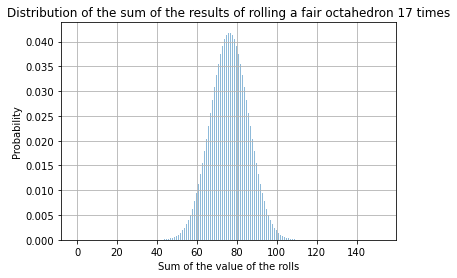

In [35]:
P={i : 1/8 for i in range(1, 9)}
n=17

res = {i: prob for i, prob in enumerate(NFoldConv(dictdist2array(P), n))}

plt.bar(res.keys(), res.values(), width=0.5, alpha=0.5)
plt.title("Distribution of the sum of the results of rolling a fair octahedron 17 times") 
plt.xlabel('Sum of the value of the rolls')
plt.ylabel('Probability');

### Question 6 - Counting Similar Strings

We define a probaility space $(\Omega, P)$:
* $\Omega = \{0,1\}^n$.
* $P$ is induced by independantly a p-coin ($p \in [0,1]$) n times.

For $\omega \in \Omega$ let $W(\omega) =$ number of 1s in $\omega$.

For $\omega \in \Omega$ let the random variable $C$ be define by:
$$C_{p, n}(\omega) = |\{\zeta : W(\zeta)=W(\omega)\}|$$

#### 6.A
Plot the distribution of $W$. What is the name of this distribution?

<div class="alert alert-info">
The probability of different numbers of 1's in a string of 0s and 1s (or of numbers of "heads" in $n$ coin tosses) is governed by the <em>Binomial</em> distribution.
</div>

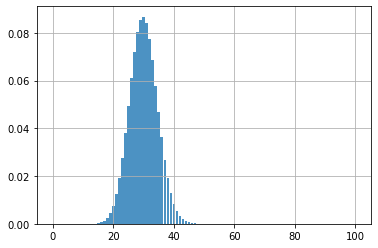

In [36]:
n = 100  # string length
p=0.3 # probability of 1 at any given position
k = np.arange(0, n+1) # possible values of the number of 1's in a string of length 100 are 0, 1, ..., 100
plt.bar(k,stats.binom.pmf(k, n, p), alpha = .8);

#### 6.B
State the formula for comuting $E(C)$.

Compute $E(C)$ for $p=0.1, 0.5, 0.8$ and $n=10, 20, 50, 100$

<div class="alert alert-info">
$C(\omega)$ is defined as the number of different srings that have exactly the same number of 1s as $\omega$. For any given string $\omega$ with number of 1's equal to $W(\omega)=k$, the total number of strings of length $n$ with the same number $k$ of 1s in them is ${n \choose k}$.

The expected value is $E[C] = \sum_{\omega \in \Omega} C(\omega) P(\omega)$. 

We can use the fact that for all sequences with exactyly $k$ 1s in them, $P(\omega)=p^k(1-p)^{n-k}$ as well as $C(\omega)={n \choose k}$ are the same, so instead we can perfom summation over different possible numbers of 1s, taking into account that for each fixed $k$ we have ${n \choose k}$ different strings $\omega$ available to us. Essentially, we'd be then computing the expectation over the Binomial:
    
$E[C] = \sum_{k=0}^n {n \choose k} \cdot \left( {n \choose k} p^k(1-p)^{n-k} \right) = \sum_{k=0}^n {n \choose k}^2 p^k(1-p)^{n-k}$
    
</div>

In [37]:
def EC(n,p):
    """Computes expected value of E[C] for given string length n and probability of 1 in any given position p"""
    k = np.arange(0,n+1) # all possible numbers of 1s in a string of length n
    # binomial probabilities to randomly choose a string of length n with any particular value of k
    # multiply those probabilities by C(w) = choose(n,k) and sum up across all k:
    return np.sum( scipy.special.comb(n,k) * stats.binom.pmf(k, n, p) )

In [38]:
for p in (0.1, 0.5, 0.8):
    print("----------------------------------")
    print("Probability of 1, p=", p, ":", sep="")
    for n in (10, 20, 50, 100):
        print(f"   n={n:3d}: E[C]={EC(n,p):.3f}")

----------------------------------
Probability of 1, p=0.1:
   n= 10: E[C]=22.576
   n= 20: E[C]=1757.746
   n= 50: E[C]=1479309659.773
   n=100: E[C]=16815694309212334080.000
----------------------------------
Probability of 1, p=0.5:
   n= 10: E[C]=180.426
   n= 20: E[C]=131460.694
   n= 50: E[C]=89609514959899.984
   n=100: E[C]=71430183238031688472564072448.000
----------------------------------
Probability of 1, p=0.8:
   n= 10: E[C]=66.950
   n= 20: E[C]=16979.432
   n= 50: E[C]=490151964857.802
   n=100: E[C]=2013008191527900950822912.000


#### 6.C 
Plot the histograms of the values of $C$ for 1000 samples drawn from the space $(\Omega, P)$ for each combination of $p$ and $n$ from the previous section. Add text to each histogram with the empirical average of $C$ and the computed value of $E(C)$ (from the previous section). In every histogram indicate the values of $n$ and $p$. 

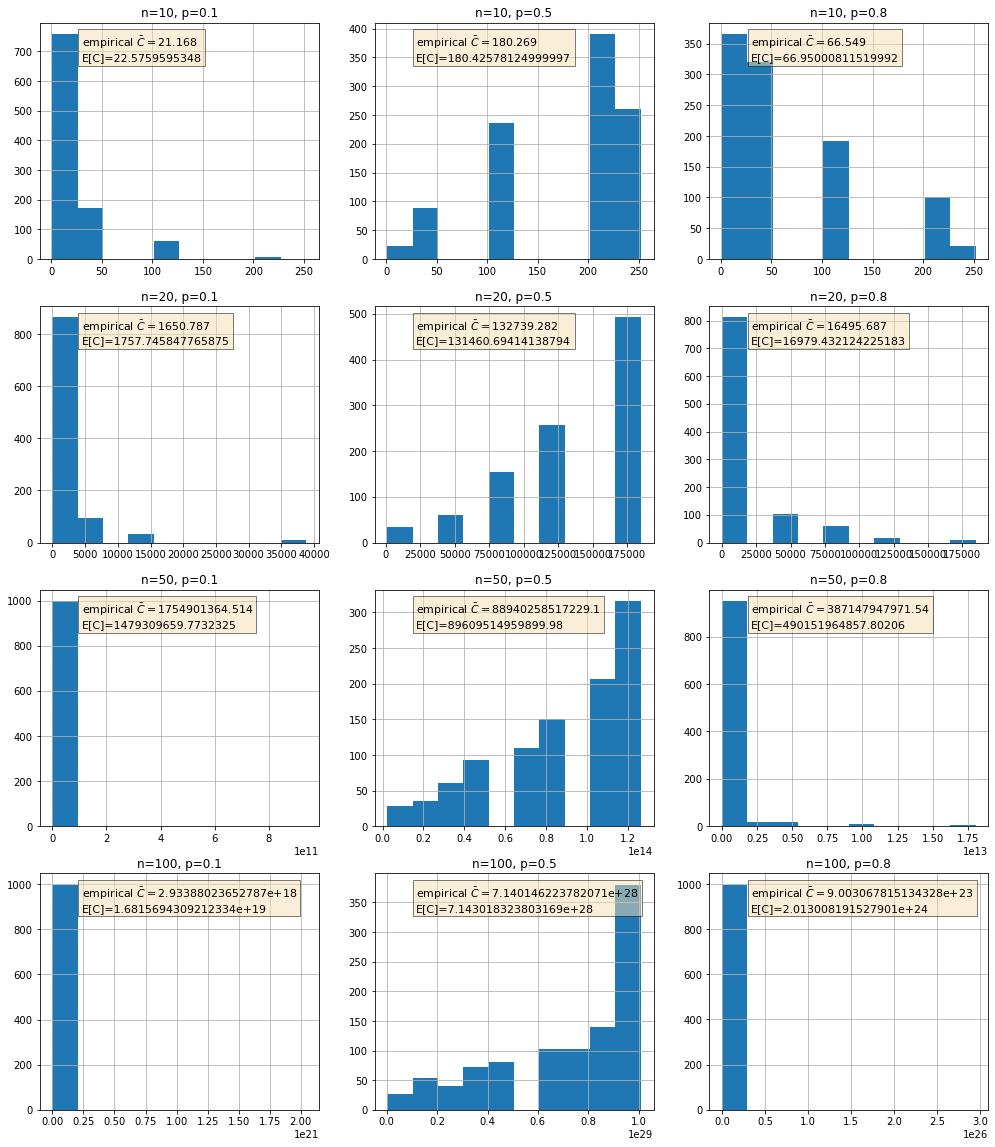

In [114]:
fig, axs = plt.subplots(4,3,figsize=(17,20))

i = 0
all_cm, all_ec = [], [] # use those to save mean C and E[C] as we compute them (for part 4, so no need to recompute again) 
for n in (10, 20, 50, 100):
    j = 0
    for p in (0.1, 0.5, 0.8):
        samples = rng.choice(np.arange(2), size=(1000,n), replace=True, p=(1-p,p)) # draw sample of 1000 strings at once
        num_ones = np.sum(samples, axis=1) # numbers of 1s in each length-n string in the sample
        C_vals = scipy.special.comb(n,num_ones) # C-values for each string w in the sample
        Cm = np.mean(C_vals)
        ec = EC(n,p)
        all_cm.append(Cm)
        all_ec.append(ec)
        ax = axs[i,j]
        ax.hist(C_vals);
        ax.set_title(f"n={n}, p={p}")
        textstr = f"empirical $\\bar{{C}}=${Cm}\nE[C]={ec}"
        props = dict(boxstyle='square', facecolor='wheat', alpha=0.5)
        ax.text(0.15, 0.95, textstr, transform=ax.transAxes, fontsize=11,
            verticalalignment='top', bbox=props);
        j += 1
    i += 1
    

#### 6.D
Use a scatter plot to compare the empirical and the computed values from the previous section

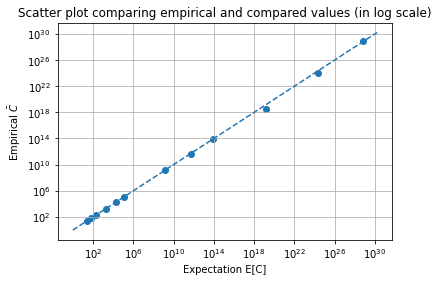

In [269]:
plt.scatter(all_ec, all_cm, marker='o')
plt.xscale('log')
plt.yscale('log')
xvals = np.array(plt.xlim())
yvals = xvals
plt.plot(xvals, yvals, '--')
plt.title("Scatter plot comparing empirical and compared values (in log scale)")
plt.ylabel('Empirical $\\bar{C}$');
plt.xlabel('Expectation E[C]');